## Test des paramètres à 100 items

In [2]:
from tools.testor import *
import tools.parser as parser
from tools.SadObject import *
import tools.tabou_solver as tbs
from tools.tabou_solver import *
from tools.Other_solver import Other_solver
from tools.MyIterator import *

import numpy as np
import matplotlib.pyplot as plt


load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\zlib1.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\abseil_dll.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\utf8_validity.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\re2.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\libprotobuf.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\highs.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\ortools.dll...


### Load les fichiers

In [3]:
sad1 = parser.loadFromFile("Data/pi-12-100-1000-001.kna")
sad2 = parser.loadFromFile("Data/pi-13-100-1000-001.kna")
sad3 = parser.loadFromFile("Data/pi-15-100-1000-001.kna")

loading file: 100%|██████████| 100/100 [00:00<00:00, 226klines/s]


### Trouver la valeur optimale

In [4]:
solver = Other_solver(sad1)
sol_opti1,_ = solver.solve()

solver = Other_solver(sad2)
sol_opti2,_ = solver.solve()

solver = Other_solver(sad3)
sol_opti3,_ = solver.solve()

print("les solutions optimales sont")
print("sad 1 :",sol_opti1,"pour",sad1.name)
print("sad 2 :",sol_opti2,"pour",sad2.name)
print("sad 3 :",sol_opti3,"pour",sad3.name)

les solutions optimales sont
sad 1 : 970 pour pi-12-100-1000-001.kna
sad 2 : 1989 pour pi-13-100-1000-001.kna
sad 3 : 1011 pour pi-15-100-1000-001.kna


### Pour la liste Tabu

Voici les différents paramètres amenés à évoluer :
-    iter_max : Nombre maximum d'itération de la boucle du solver 
-    tabu_size : Taille de la liste tabu
-   max_weight : si =1, on essaye de trouver une solution inférieur à la capacité. Si c'est 2, 2 fois la capacité, etc.
- def_sol_size : rapport entre la capactié du sac à dos et le poids de la solution initiale (0.5, moitié de la capacité)

#### Initialisation des paramètres

In [5]:
iter_max = 1000
tabu_size = 5
tabu_size_for2 = 95
max_weight = 1.0
init_size = 0.5

group_size = 10 #nombre de tests de chaque paramètres dans une éxecutions.

#### Test taille TABU

calcul: 100%|██████████| 21/21 [00:24<00:00,  1.17s/batch]


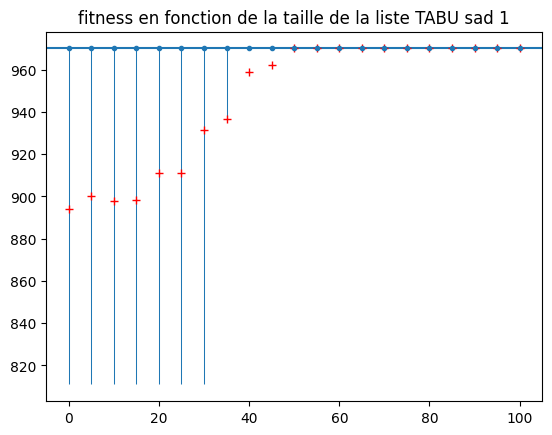

calcul: 100%|██████████| 21/21 [00:26<00:00,  1.24s/batch]


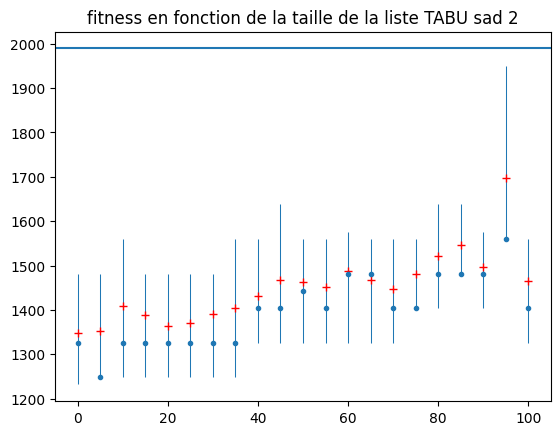

calcul: 100%|██████████| 6/6 [00:06<00:00,  1.08s/batch]


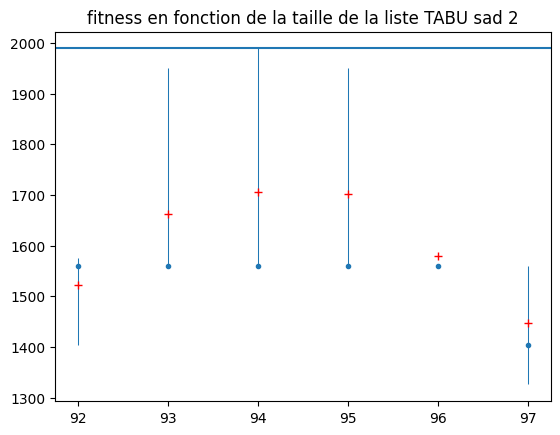

calcul: 100%|██████████| 21/21 [00:26<00:00,  1.26s/batch]


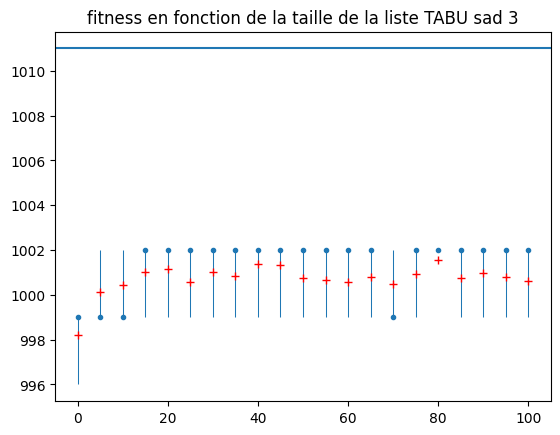

In [16]:
(variateur,title) = variateur_tabou.liste_tabou()

test = Testor(tbs.Tabou_solver(sad1,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(range(0,101,5),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.Tabou_solver(sad2,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(range(0,101,5),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

testResult = test.test(range(92,98,1),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.Tabou_solver(sad3,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(range(0,101,5),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


Pour le premier sac à dos  : 
- taille 12 : la médiane passe à la solution max.

- taille 38 : 80% des solutions trouvées sont optimales

- taille 50 : toutes les solutions trouvées sont optimales.

Pour le second :
- tout est "mauvais", sauf quand la taille de la liste tabou est entre 93 et 95 (pour une raison... Qui existe.)

Pour le troisième : La taille de la liste semble ne pas avoir d'impact.

## test suivant : nombre d'itérations max

calcul: 100%|██████████| 30/30 [00:09<00:00,  3.04batch/s]


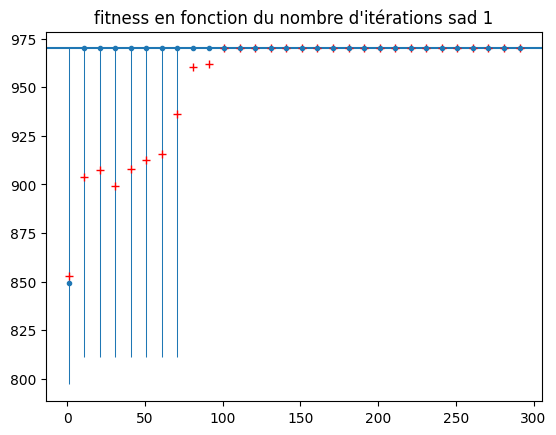

calcul: 100%|██████████| 17/17 [00:18<00:00,  1.09s/batch]


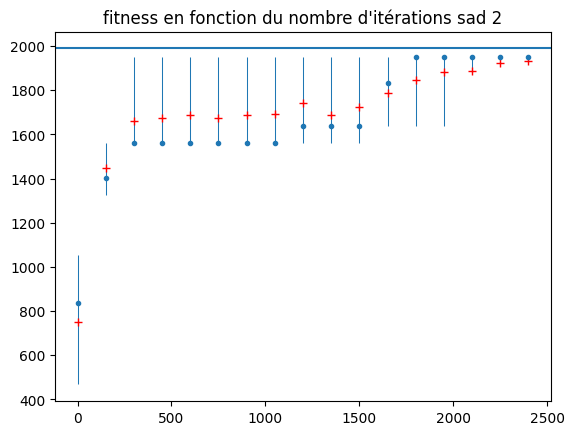

calcul: 100%|██████████| 11/11 [00:58<00:00,  5.35s/batch]


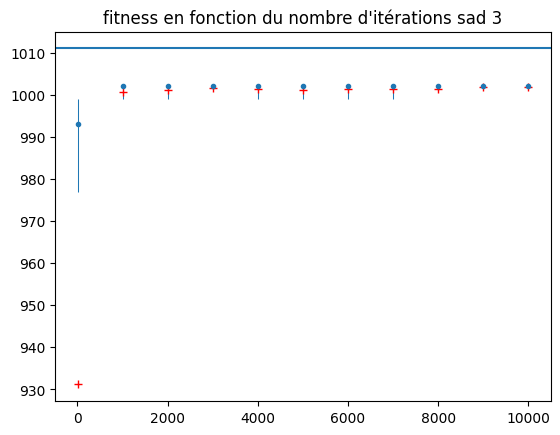

In [ ]:
tabu_size = 60
tabu_size_for2 = 95
(variateur,title) = variateur_tabou.nombre_iterations()

test = Testor(tbs.Tabou_solver(sad1,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(range(1,300,10),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.Tabou_solver(sad2,iter_max,tabu_size_for2,max_weight,init_size))
testResult = test.test(range(0,2500,150),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.Tabou_solver(sad3,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(range(10,7012,1000),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")
testResult = test.test(range(10,700,50),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


Pour le premier sac à dos, il suffit de 100 itérations pour trouver la solution optimale de manière quasi systématique.

Pour le second, c'est plus compliqué :
- la solution optimale est environ 1970.
- à partir de 300 itérations, on commence à trouver des solutions acceptables: 80% des solutions sont au dessus de 1550 (diff de 400)
- mais il en faut 2200 pour mieux s'en approcher, et avoir 80% des solutions aus dessus de 1900 (diff de 50)
- Pour un temps au maximum 8 fois plus long, on multiplie la qualité de la solution par 8. Donc, c'est un bon chiffre.
On va donc maintenant tester....

Pour le troisième sad, le nombre d'itération ne semble pas avoir d'impact du tout, tant qu'on est au dessus de

## Le poids maximal accepté

calcul: 100%|██████████| 15/15 [00:05<00:00,  2.71batch/s]


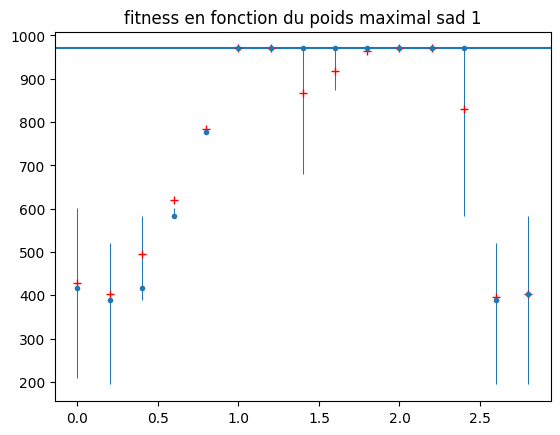

calcul: 9batch [00:04,  1.99batch/s]                    


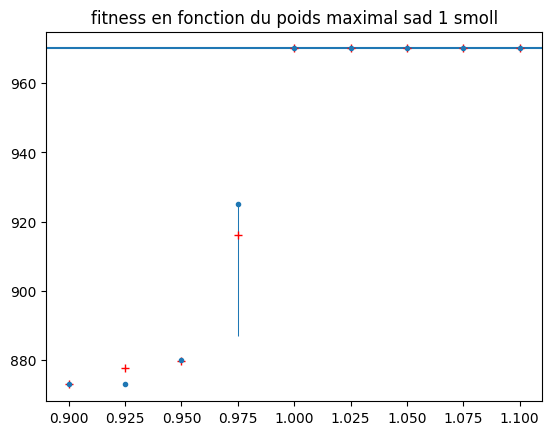

calcul: 100%|██████████| 15/15 [00:22<00:00,  1.51s/batch]


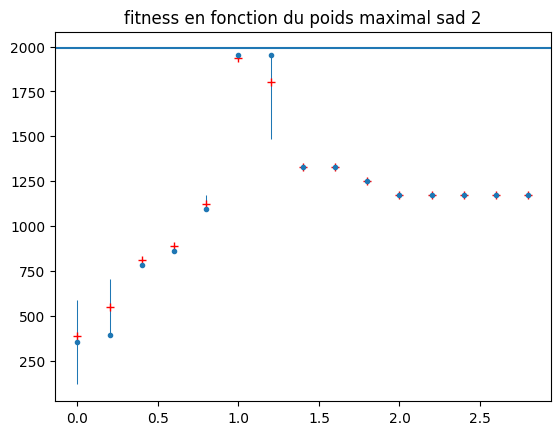

calcul: 9batch [00:13,  1.49s/batch]                    


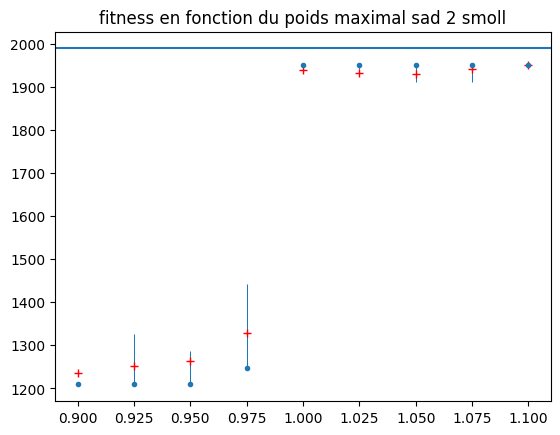

calcul: 100%|██████████| 15/15 [00:06<00:00,  2.43batch/s]


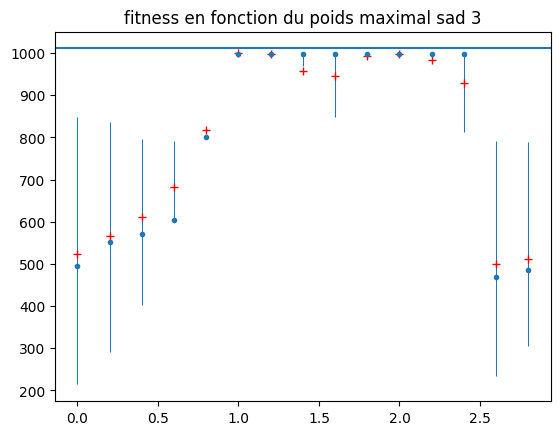

calcul: 9batch [00:04,  1.88batch/s]                    


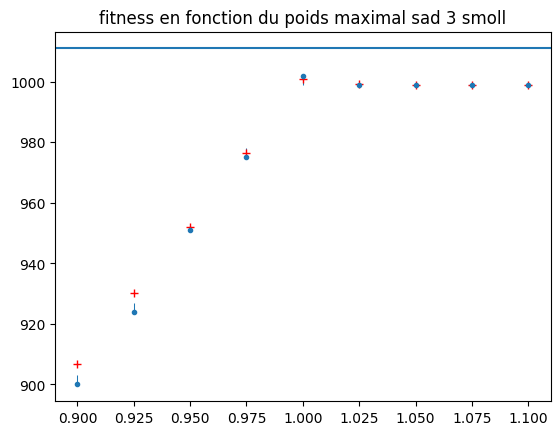

In [ ]:
iter_max = 200 # on récupère le résultat précédent
tabu_size = 60
iter_max_for2 = 2200
tabu_size_for2 = 95
iterateur = floatRange(0.0,3.0,0.2) #on va tester entre 0.1 et 2.0 avec un pas de 0.1
smollIterateur = floatRange(0.9,1.11,0.025)
#on donne une taille initiale très faible pour mieux observer l'impacte du poids max accepté
solver = tbs.Tabou_solver(sad1,iter_max,tabu_size,0,def_sol_size=0.01)

(var,titre) = variateur_tabou.poids_max_accepte()
test = Testor(solver)
testResult = test.test(iterateur,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

testResult = test.test(smollIterateur,var,group_size)   
graph_test_result(testResult ,sol_opti1,titre+ " sad 1 smoll")

solver = tbs.Tabou_solver(sad2,iter_max_for2,tabu_size_for2,0,def_sol_size=0.01)
test = Testor(solver)
testResult = test.test(iterateur,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

testResult = test.test(smollIterateur,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2 smoll")

solver = tbs.Tabou_solver(sad3,iter_max,tabu_size,0,def_sol_size=0.01)
test = Testor(solver)
testResult = test.test(iterateur,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")

testResult = test.test(smollIterateur,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3 smoll")



On constate que le poids maximal a une forte influence sur la solution trouvée, et on peut le décomposer en 3 sections :

1 : plat, la solution gardée est celle trouvée au dépat, qui est supérieur à la taille max.

2 : croissance : la solution trouvée se "colle" à la taille max

3 : Optimum : on a un plat entre 1 et 1.25 où la solution  optimale est trouvée, car il n'y a pas d'élément qui fait 25% de la capacité du sac à dos (du moins je suppose) 

4 : aléatoire/plat truc : la taille max est supérieur à la capacité du sac a dos, et et le résultat gardé est pris parmis les solutions utilisées pour "monter" jusqu'à la taille max.

On va donc prendre 1 comme valeur de référence, et on va tester les autres valeurs en fonction de ça.

## variation de la taille de la solution initiale

calcul: 100%|██████████| 9/9 [00:10<00:00,  1.21s/batch]


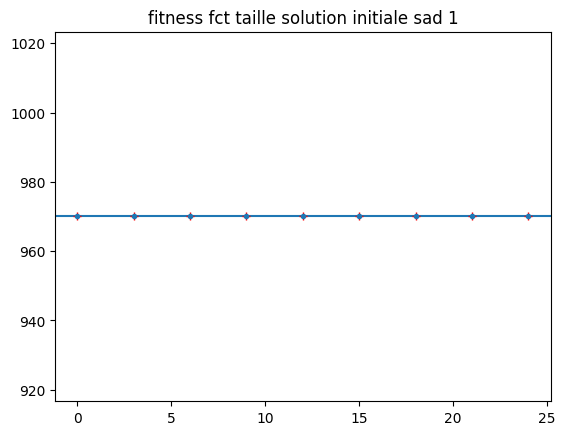

calcul: 16batch [00:17,  1.09s/batch]                     


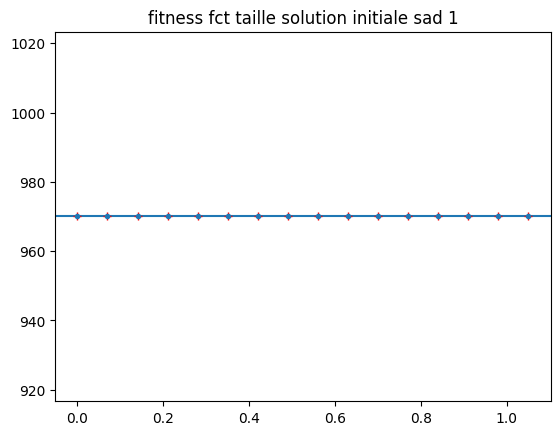

calcul: 100%|██████████| 9/9 [00:10<00:00,  1.15s/batch]


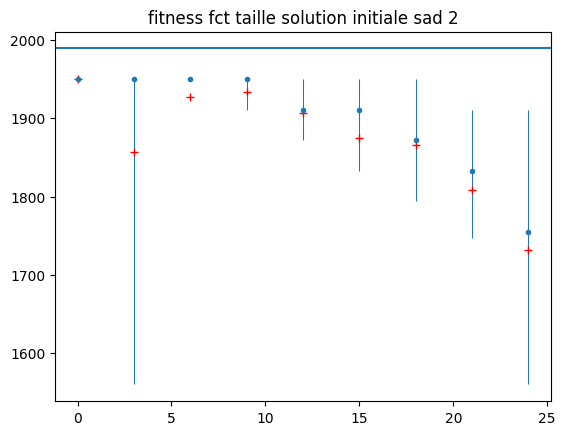

calcul: 16batch [00:15,  1.04batch/s]                     


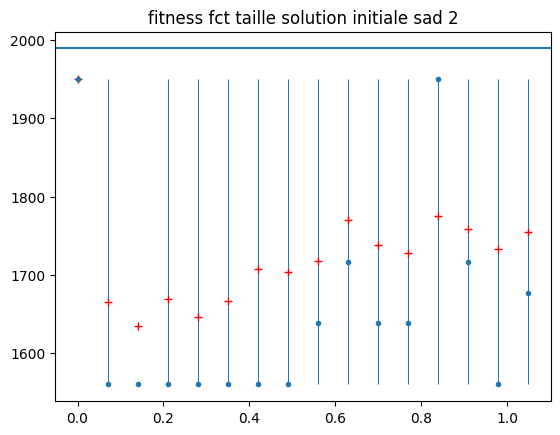

calcul: 100%|██████████| 9/9 [00:12<00:00,  1.42s/batch]


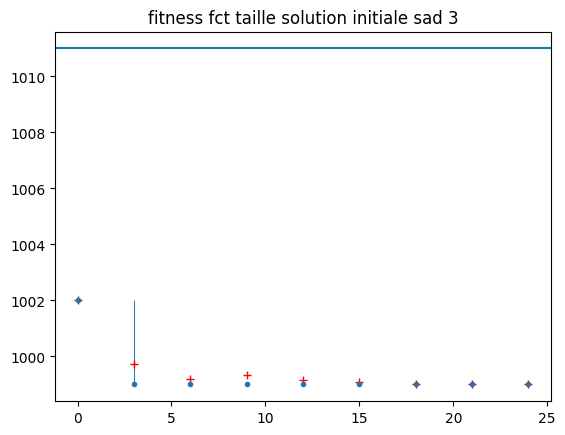

calcul: 16batch [00:23,  1.45s/batch]                     


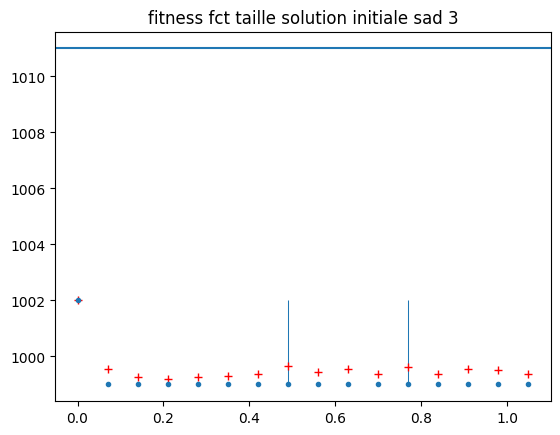

In [ ]:
max_weight = 1.0

(variateur,title) = variateur_tabou.poids_inital()
iterateur = range(0,25,3)
closeIter = floatRange(0,1.1,0.07)
test = Testor(tbs.Tabou_solver(sad1,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(iterateur,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.Tabou_solver(sad2,iter_max,tabu_size_for2,max_weight,init_size))
testResult = test.test(iterateur,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")


test = Testor(tbs.Tabou_solver(sad3,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(iterateur,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


Ce qui a l'air le mieux avec ces solutions initiales, c'est de prendre 0 comme valeur et de laisser l'algorithme trouver la solution... mais on ne le fait pas pour avoir des solutions différentes d'une itértation sur l'autre

### paramètres Optimaux :

In [ ]:
iter_max1n3 = 200 # on récupère le résultat précédent
tabu_size1n3 = 60
iter_max_for2 = 2200
tabu_size_for2 = 95
max_weight = 1.0
taille_init = 0.01 #1 item